## Runs DE on different clusters. Also runs DE within each cluster for each condition

In [1]:
# Input info
# integrated_f = "/data/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/allSamples.integrated.rds"
# outdir = "/data/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DE" 
integrated_f = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/allSamples.integrated.rds"
sample_names = "preB,postB"
outdir = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01"

# Parameters
nTop = 25000
assay="RNA"

minPct = 0.01
cores = 4


comps_f = ""
#cond.comparisons <- "A,preA,postA;B,preB,postB"

In [2]:
outdir

[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01"

In [3]:
clust_outdir = file.path(outdir, "clusters")
clust_atac_outdir = file.path(outdir, "clusters_atac")
cond_outdir = file.path(outdir, "conditions_clusters")
cons_outdir = file.path(outdir, "conditions_conserved")
dir.create(outdir, showWarnings = FALSE)
dir.create(clust_outdir, showWarnings = FALSE)
dir.create(cond_outdir, showWarnings = FALSE)
dir.create(cons_outdir, showWarnings = FALSE)
dir.create(clust_atac_outdir, showWarnings = FALSE)

In [4]:
sample_names <- unlist(strsplit(sample_names, ",")[[1]])
#samples <- unlist(strsplit(samples, ","))

sample_names

[1] "preB"  "postB"

In [5]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library("RColorBrewer")

library(future)
plan()

plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Attaching SeuratObject

Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required pa

sequential:
- args: function (..., envir = parent.frame())
- tweaked: FALSE
- call: NULL

Warning message:
"Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'."


In [6]:
integrated <- readRDS(integrated_f)#file.path(indir, paste0("allSamples.integrated.rds")))
integrated

An object of class Seurat 
62328 features across 3683 samples within 2 assays 
Active assay: RNA (20010 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [7]:
integrated[['peak_region_fragments']]

,peak_region_fragments
,<dbl>
preB_AAACGAAGTCACTCTC-1,5325
preB_AAACGAAGTCCCTAAA-1,5461
preB_AAACGAAGTCTGTGTA-1,1246
preB_AAACTCGCAACTCGTA-1,7857
preB_AAACTCGCAGAACGAC-1,8179
preB_AAACTGCCACACATGT-1,1672
preB_AAAGATGGTTTGACCA-1,4167
preB_AAAGATGTCCGTCAAA-1,2221
preB_AAAGATGTCTCTGTTA-1,4294


In [8]:
integrated[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.enrichment,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>
preB_AAACGAAGTCACTCTC-1,preB,3754,3754,38954,29912,335,145,1057,0,7505,⋯,2.104279,0.48,70.95270,0,High,NS < 4,0,0,3751,2539
preB_AAACGAAGTCCCTAAA-1,preB,4130,4130,24309,15056,258,113,968,0,7914,⋯,1.425693,0.06,69.00430,0,Low,NS < 4,6,6,4280,2832
preB_AAACGAAGTCTGTGTA-1,preB,683,683,17674,15525,189,72,200,0,1688,⋯,2.277722,0.61,73.81517,0,High,NS < 4,2,2,581,517
preB_AAACTCGCAACTCGTA-1,preB,5270,5270,39016,26386,437,223,1941,0,10029,⋯,2.793040,0.82,78.34281,0,High,NS < 4,6,6,5460,3063
preB_AAACTCGCAGAACGAC-1,preB,5575,5575,70990,51473,759,331,2599,0,15828,⋯,1.793144,0.25,51.67425,0,Low,NS < 4,5,5,8266,3971
preB_AAACTGCCACACATGT-1,preB,968,968,23591,20903,197,96,328,0,2067,⋯,2.353202,0.66,80.89018,0,High,NS < 4,0,0,792,645
preB_AAAGATGGTTTGACCA-1,preB,2719,2719,52480,41104,526,355,1808,0,8687,⋯,1.327561,0.03,47.96823,0,Low,NS < 4,5,5,3984,2639
preB_AAAGATGTCCGTCAAA-1,preB,1677,1677,13817,9880,167,66,514,0,3190,⋯,1.923077,0.35,69.62382,0,Low,NS < 4,7,7,1573,1244
preB_AAAGATGTCTCTGTTA-1,preB,3013,3013,28453,20833,270,144,1272,0,5934,⋯,2.449402,0.72,72.36266,0,High,NS < 4,9,9,2832,1951


## Compute DE for each cluster

In [9]:
plotDE <- function(integrated, de.results, i, outdir){
    try
    {
    plot1 <- VlnPlot(
      object = integrated,
      features = rownames(de.results)[1],
      pt.size = 0.1,
      idents = i
    )
    plot2 <- FeaturePlot(
      object = integrated,
      features = rownames(de.results)[1],
      pt.size = 0.1
    )

    plot3 <- FeaturePlot(
      object = integrated,
      features = rownames(de.results)[2],
      pt.size = 0.1
    )
    
    plot1 | plot2 | plot3
    
    ggsave(file.path(outdir,paste0("cluster_",i,".DE.GeneActivity.top2.png")))
    
    return(c(plot1, plot2, plot3))
    }
    return
}

## Loop through each cluster and run DA for RNA-seq

In [10]:
cluster.ids <- sort(unique(integrated$seurat_clusters))
for (i in cluster.ids){ #or however many clusters you have
try({
    print(paste("cluster", i))
    da.peaks <- FindMarkers(
                  object = integrated,
                  ident.1 = i, #"CD4 Naive",
                  min.pct = minPct,
                  test.use = 'LR', latent.vars = 'peak_region_fragments'
                )
    print(file.path(clust_outdir, paste0("cluster_",i,".DE.GeneActivity.csv")))
    print(head(da.peaks))
    write.csv(da.peaks, file=file.path(clust_outdir, paste0("cluster_",i,".DE.GeneActivity.csv")))
    print(paste('saved cluster', i))
    plotDE(integrated, da.peaks, i, clust_outdir)
    print(paste('plotted cluster', i))
    
})
}

[1] "cluster 0"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_0.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
ANKRD44 1.608616e-47  0.5259003 0.628 0.419 3.218840e-43
PLCG2   2.319839e-44 -0.5220017 0.114 0.392 4.641999e-40
TVP23A  1.379250e-42 -0.3498266 0.034 0.274 2.759880e-38
LPCAT1  2.537309e-40 -0.4206341 0.086 0.341 5.077155e-36
ADAM9   3.522462e-37 -0.4613041 0.244 0.533 7.048447e-33
PFDN1   2.366108e-36 -0.4337015 0.144 0.420 4.734583e-32
[1] "saved cluster 0"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 0"
[1] "cluster 1"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_1.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2     p_val_adj
MAPK1  3.886688e-153  0.7392848 0.593 0.090 7.777264e-149
CDC123 2.019547e-147  0.7174858 0.593 0.092 4.041115e-143
TVP23A 1.521371e-142  0.7688801 0.673 0.141 3.044263e-138
BANP   3.648529e-142  0.7585823 0.592 0.112 7.300707e-138
PLCG2  1.883437e-134  0.9121822 0.769 0.253 3.768757e-130
PAX5   3.807500e-130  0.8270445 0.692 0.208 7.618807e-126
[1] "saved cluster 1"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 1"
[1] "cluster 2"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_2.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2    p_val_adj
GNG7         5.394666e-17 -0.3750258 0.173 0.497 1.079473e-12
TVP23A       1.350391e-16 -0.2974379 0.050 0.250 2.702133e-12
RPTOR        1.830396e-15 -0.3137415 0.490 0.805 3.662622e-11
RELA         2.236225e-14 -0.2861981 0.173 0.480 4.474686e-10
TMEM91       1.145537e-13 -0.3183283 0.217 0.527 2.292219e-09
CTC-435M10.3 2.198941e-13 -0.3091857 0.269 0.585 4.400081e-09
[1] "saved cluster 2"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 2"
[1] "cluster 3"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_3.DE.GeneActivity.csv"
                     p_val avg_log2FC pct.1 pct.2     p_val_adj
RNF103-CHMP3 1.029231e-113  0.9171994 0.752 0.285 2.059491e-109
CHMP3        1.185500e-113  0.9169298 0.752 0.286 2.372186e-109
KLRC4-KLRK1   2.030386e-57  0.4369801 0.391 0.084  4.062802e-53
DKK2          2.494363e-35  0.4533115 0.907 0.706  4.991221e-31
ANKRD6        1.923408e-32  0.4294474 0.885 0.680  3.848740e-28
RHOH          8.688419e-25  0.3733322 0.728 0.491  1.738553e-20
[1] "saved cluster 3"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 3"
[1] "cluster 4"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_4.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2    p_val_adj
C10ORF68 4.693034e-43  0.6324593 0.807 0.557 9.390760e-39
ATXN1    4.193059e-36  0.5520842 0.904 0.703 8.390310e-32
MKLN1    1.047376e-30  0.5201333 0.938 0.821 2.095800e-26
NBEAL1   1.531327e-29  0.5180847 0.592 0.317 3.064185e-25
BRIP1    1.514170e-25  0.4335581 0.765 0.513 3.029854e-21
FAM129A  3.988469e-21  0.4290504 0.490 0.272 7.980926e-17
[1] "saved cluster 4"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 4"
[1] "cluster 5"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_5.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2     p_val_adj
FAM101A 4.212943e-143  1.2841128 0.969 0.435 8.430098e-139
FANCI   1.883474e-139  0.8685839 0.757 0.050 3.768831e-135
ATP9A   3.776634e-127  1.0839343 0.925 0.182 7.557045e-123
RBM47   1.312961e-124  1.0551696 0.886 0.203 2.627236e-120
TMEM87B 1.924983e-117  0.8250333 0.698 0.051 3.851891e-113
RAB31   5.509754e-116  0.9737256 0.851 0.124 1.102502e-111
[1] "saved cluster 5"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 5"
[1] "cluster 6"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_6.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2    p_val_adj
HNF1B        7.301522e-63  0.7916946 0.602 0.134 1.461034e-58
APMAP        9.798894e-62  0.8212162 0.602 0.124 1.960759e-57
RP11-468E2.4 1.567658e-56  0.6069870 0.410 0.033 3.136884e-52
BRE          2.853392e-50  0.8469951 0.855 0.571 5.709638e-46
ZBTB16       1.515071e-49  0.8414594 0.659 0.288 3.031658e-45
ARHGDIG      2.280687e-48  0.5743878 0.494 0.119 4.563654e-44
[1] "saved cluster 6"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 6"
[1] "cluster 7"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_7.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2    p_val_adj
HNF1B    1.881265e-49  0.8926883 0.580 0.145 3.764412e-45
GPR114   3.428666e-43  0.8191237 0.563 0.149 6.860761e-39
APMAP    3.205741e-36  0.7279634 0.557 0.137 6.414688e-32
STARD3NL 4.698467e-35  0.7566418 0.586 0.203 9.401633e-31
CDC37    3.286428e-34  0.6699695 0.483 0.146 6.576143e-30
ANKRD6   1.455736e-32 -0.8911385 0.333 0.726 2.912927e-28
[1] "saved cluster 7"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 7"
[1] "cluster 8"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_8.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2    p_val_adj
TVP23A 1.278474e-18 -0.2972969 0.123 0.227 2.558227e-14
HNF1B  4.637751e-16 -0.2503698 0.075 0.169 9.280139e-12
PLCG2  1.063081e-15 -0.3679615 0.336 0.332 2.127225e-11
ABL1   4.036123e-14  0.2811487 0.726 0.237 8.076282e-10
IQSEC1 6.177371e-13 -0.3949890 0.801 0.597 1.236092e-08
PFDN1  4.658892e-12 -0.3114138 0.459 0.357 9.322443e-08
[1] "saved cluster 8"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 8"
[1] "cluster 9"
[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_9.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2    p_val_adj
ZBTB16   7.747384e-52  1.0793772 0.823 0.294 1.550252e-47
ZDBF2    1.000181e-27 -0.6159226 0.054 0.456 2.001362e-23
STARD3NL 6.479696e-25  0.6593137 0.623 0.207 1.296587e-20
GDF15    1.792543e-22  0.3767712 0.338 0.049 3.586879e-18
FYCO1    2.875496e-20  0.5875490 0.554 0.228 5.753868e-16
CAMKK1   1.057952e-18  0.5060313 0.485 0.144 2.116961e-14
[1] "saved cluster 9"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 9"
[1] "cluster 10"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/mergedSamples/DE_minPct_01/clusters/cluster_10.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2    p_val_adj
MRPS6    1.592314e-18  1.2505632 0.947 0.079 3.186220e-14
SLC5A3   1.125348e-15  0.8604934 0.684 0.034 2.251822e-11
SLC5A3.1 1.125348e-15  0.8604934 0.684 0.034 2.251822e-11
IGSF5    8.488631e-14  0.9208795 0.737 0.040 1.698575e-09
FOXRED2  1.954713e-13  0.6816585 0.579 0.019 3.911381e-09
APOBEC3G 2.239152e-11  0.7801789 0.737 0.069 4.480544e-07
[1] "saved cluster 10"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 10"


In [11]:
# library(stats)
# p.adjust(p, method = p.adjust.methods, n = length(p))
# p.adjust.methods
# # c("holm", "hochberg", "hommel", "bonferroni", "BH", "BY",
# #   "fdr", "none")

## Stimulus specific response in each cluster

In [12]:
outdir <- cond_outdir
#sample_names
cluster.ids <- sort(unique(integrated$seurat_clusters))
integrated$celltype.stim <- paste(integrated$seurat_clusters, integrated$orig.ident, sep = "_")
integrated$celltype <- integrated$seurat_clusters
Idents(integrated) <- "celltype.stim"

for (c in cluster.ids){
    try({
        print(c)
        response <- FindMarkers(integrated, 
                                ident.1 = paste0(c, "_", sample_names[[1]]), 
                                ident.2 = paste0(c, "_", sample_names[[2]]), 
                                verbose = FALSE,
                                test.use = 'LR', min.pct = minPct,
                                latent.vars = 'peak_region_fragments'
                               )
        if (!(dim(response)[1]==0)){

            print(head(response, n = 15))
            curr_clust <- subset(integrated, seurat_clusters == c)
            avg_curr_clust <- data.frame(log1p(AverageExpression(curr_clust, verbose = FALSE)$RNA))
            avg_curr_clust$gene <- rownames(avg_curr_clust)

            p1 <- ggplot(avg_curr_clust, aes_string(paste0("X", c, "_", sample_names[[1]]), paste0("X", c, "_", sample_names[[2]]))) + geom_point() + ggtitle(paste("Cluster", c))
            p1 <- LabelPoints(plot = p1, points = rownames(head(response, n = 15)), repel = TRUE)
            plot_grid(p1)
            write.csv(response, file=file.path(outdir,paste0("cluster_",c,".conditionDE.csv")))
            ggsave(file.path(outdir,paste0("cluster_",c,".conditionScatter.png")))

        }
    })

    }




[1] "0"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
ASTN1   1.380626e-11 -0.3911128 0.089 0.232 2.762632e-07
EDA     4.031361e-11 -0.3451740 0.159 0.300 8.066753e-07
PIK3C2G 4.149781e-10 -0.4011680 0.154 0.291 8.303711e-06
GRIN2A  8.955208e-10 -0.2978380 0.079 0.218 1.791937e-05
PCCA    5.431711e-09 -0.3488877 0.168 0.288 1.086885e-04
THSD7A  5.470469e-09 -0.3195984 0.234 0.328 1.094641e-04
WSCD1   7.667054e-09 -0.2581179 0.089 0.203 1.534177e-04
CNTN1   1.287903e-08 -0.2873046 0.150 0.282 2.577095e-04
SGK223  1.717707e-08  0.4225631 0.294 0.078 3.437131e-04
FMN2    1.740236e-08 -0.3677299 0.201 0.364 3.482212e-04
FAM72B  2.960970e-08  0.3543377 0.336 0.101 5.924900e-04
PAK7    2.979751e-08 -0.3071903 0.065 0.234 5.962482e-04
BACH1   3.542879e-08 -0.3177210 0.117 0.258 7.089301e-04
ADCY2   5.013863e-08 -0.2975026 0.154 0.255 1.003274e-03
WDR70   9.158598e-08 -0.3241193 0.140 0.289 1.832635e-03


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "1"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
FAM72B  3.916091e-18  0.4816286 0.536 0.113 7.836098e-14
FMN2    1.801208e-08 -0.3866568 0.214 0.398 3.604218e-04
CPA6    1.492605e-07 -0.2678201 0.153 0.298 2.986703e-03
PLXDC2  1.685588e-07 -0.4843481 0.255 0.419 3.372862e-03
GRIN2B  2.018808e-07 -0.3555907 0.230 0.395 4.039635e-03
CNTNAP4 8.340026e-07 -0.2852893 0.107 0.255 1.668839e-02
SGK223  1.322798e-06  0.2669926 0.224 0.073 2.646918e-02
NBPF1   2.160247e-06  0.3793900 0.745 0.516 4.322654e-02
TMTC2   2.561691e-06 -0.3331249 0.265 0.422 5.125945e-02
DOCK2   2.943929e-06 -0.2631217 0.179 0.317 5.890801e-02
RELA    3.179819e-06  0.2951518 0.571 0.339 6.362818e-02
TNIP1   3.269303e-06  0.3366937 0.867 0.734 6.541876e-02
PRMT8   3.425211e-06 -0.2575987 0.066 0.142 6.853848e-02
HCN1    3.605111e-06 -0.4153718 0.327 0.481 7.213828e-02
PRKCB   4.131073e-06  0.3105422 0.852 0.653 8.266276e-02


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "2"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                p_val avg_log2FC pct.1 pct.2    p_val_adj
THRB     2.439460e-11 -0.3945402 0.060 0.231 4.881359e-07
MEI4     6.611009e-11 -0.3268680 0.051 0.199 1.322863e-06
ANO3     7.789498e-10 -0.4413128 0.125 0.294 1.558679e-05
CACNA2D1 3.024209e-09 -0.3858381 0.148 0.325 6.051442e-05
KCND2    7.605757e-09 -0.3488843 0.148 0.322 1.521912e-04
TRPC5    2.618707e-08 -0.3767093 0.065 0.206 5.240033e-04
FAM13A   2.691301e-08 -0.5335756 0.139 0.343 5.385294e-04
PRKDC    2.695386e-08 -0.2705885 0.032 0.147 5.393468e-04
PLXDC2   4.267784e-08 -0.3271568 0.106 0.297 8.539836e-04
STAG2    5.475233e-08 -0.3071939 0.074 0.241 1.095594e-03
CPA6     9.503344e-08 -0.3970826 0.079 0.220 1.901619e-03
RIT2     1.047354e-07 -0.3068766 0.106 0.262 2.095755e-03
RASAL2   1.518137e-07 -0.3061592 0.093 0.227 3.037792e-03
GAREM    1.902234e-07 -0.4108849 0.097 0.266 3.806371e-03
ASTN1    2.015078e-07 -0.2707250 0.023 0.182 4.032172e-03


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "3"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                p_val avg_log2FC pct.1 pct.2    p_val_adj
FAM72B   2.094445e-12  0.4496519 0.529 0.105 4.190984e-08
SGK223   1.515067e-09  0.4548416 0.462 0.082 3.031649e-05
BNC2     3.781588e-08 -0.3793263 0.192 0.342 7.566958e-04
ADCY7    9.600586e-08  0.4134877 0.510 0.235 1.921077e-03
RCAN2    1.165228e-07 -0.3336862 0.125 0.222 2.331621e-03
OPHN1    1.180640e-07 -0.2870740 0.115 0.253 2.362460e-03
GTDC1    1.909738e-07 -0.2999277 0.154 0.332 3.821387e-03
DOCK4    1.425671e-06 -0.3811055 0.375 0.505 2.852768e-02
ASAP1    2.088583e-06 -0.3987541 0.163 0.278 4.179255e-02
ARL15    2.669712e-06 -0.3152652 0.279 0.401 5.342093e-02
TMEM132B 2.684131e-06 -0.2895118 0.231 0.321 5.370946e-02
NEB      6.252167e-06 -0.3004651 0.106 0.207 1.251059e-01
CAMKMT   8.647087e-06 -0.2859144 0.269 0.342 1.730282e-01
CCSER2   9.710822e-06 -0.2659886 0.096 0.194 1.943135e-01
PRICKLE2 1.139562e-05 -0.2525173 0.173 0.260 2.280263e-01


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "4"
                p_val avg_log2FC pct.1 pct.2    p_val_adj
C8orf34  1.460850e-08 -0.3389946 0.163 0.330 0.0002923162
HECW2    2.795883e-08  0.3472045 1.000 0.933 0.0005594562
NBPF1    7.569085e-07  0.4494283 0.767 0.438 0.0151457387
FAM72B   2.335607e-06  0.3299600 0.419 0.109 0.0467354976
OXR1     3.462104e-06 -0.3235498 0.163 0.303 0.0692766970
TACC2    4.475597e-06 -0.2722229 0.058 0.213 0.0895566941
CRX      5.401725e-06  0.4280962 0.849 0.592 0.1080885128
FILIP1L  5.474749e-06 -0.3426762 0.337 0.453 0.1095497184
RCN1     7.038528e-06 -0.3309932 0.198 0.326 0.1408409407
SGK223   1.023519e-05  0.3617821 0.419 0.131 0.2048061679
SAMD12   1.583711e-05 -0.2595397 0.244 0.318 0.3169005236
PCLO     2.084103e-05 -0.3130190 0.209 0.356 0.4170290271
FAM172A  2.550620e-05 -0.3499616 0.221 0.341 0.5103790648
ADAMTSL1 3.814448e-05 -0.3216858 0.198 0.333 0.7632711053
CMSS1    4.507347e-05 -0.3014557 0.442 0.513 0.9019201656


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "5"
                    p_val avg_log2FC pct.1 pct.2 p_val_adj
NCAM1        9.337763e-06 -0.3200668 0.152 0.423 0.1868486
TSPAN18      4.905380e-05 -0.2809176 0.333 0.500 0.9815665
KIAA1467     5.221446e-05 -0.3881529 0.242 0.514 1.0000000
VOPP1        6.392096e-05 -0.3905639 0.424 0.640 1.0000000
DFNA5        1.302123e-04 -0.3439426 0.242 0.518 1.0000000
TM7SF2       1.632094e-04  0.3447933 0.667 0.320 1.0000000
ABCC1        1.738462e-04 -0.2954373 0.333 0.486 1.0000000
DET1         2.045778e-04  0.3622697 0.818 0.577 1.0000000
MKLN1        2.153603e-04 -0.4450535 0.939 0.950 1.0000000
RBFOX2       4.349454e-04  0.3454310 0.970 0.856 1.0000000
SLC14A2      7.292004e-04 -0.3164620 0.212 0.401 1.0000000
RP11-145E5.5 9.009146e-04 -0.3895908 0.697 0.829 1.0000000
PTH2R        1.094031e-03 -0.2651795 0.303 0.495 1.0000000
ZFAND3       1.165207e-03 -0.3671371 0.606 0.766 1.0000000
RUNDC3B      1.276197e-03 -0.2904817 0.333 0.468 1.0000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "6"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


               p_val avg_log2FC pct.1 pct.2 p_val_adj
GABRB2  1.730395e-06 -0.2683554 0.014 0.183 0.0346252
SGK223  5.055811e-06  0.4315156 0.351 0.103 0.1011668
TEAD1   3.839994e-05 -0.3153111 0.054 0.171 0.7683828
PKHD1   4.016162e-05 -0.2814280 0.081 0.269 0.8036340
OXR1    5.955743e-05 -0.3711976 0.149 0.309 1.0000000
EBF1    6.692944e-05 -0.2649212 0.095 0.240 1.0000000
MORN1   7.130038e-05 -0.3311593 0.338 0.560 1.0000000
DGKQ    7.408004e-05  0.4194394 0.446 0.194 1.0000000
FARSA   7.539445e-05  0.3530647 0.338 0.143 1.0000000
CACNB4  8.562946e-05 -0.3661823 0.392 0.617 1.0000000
ZNF385B 9.185636e-05 -0.3546277 0.149 0.291 1.0000000
MSR1    1.223303e-04 -0.4102103 0.135 0.286 1.0000000
SOWAHB  1.402373e-04  0.4417323 0.554 0.360 1.0000000
ALDH3B2 1.590875e-04  0.3616270 0.351 0.143 1.0000000
GLRA1   2.194133e-04  0.4896591 0.730 0.560 1.0000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "7"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                p_val avg_log2FC pct.1 pct.2 p_val_adj
PDZRN3   5.981556e-06 -0.3915302 0.062 0.239 0.1196909
QTRTD1   1.133755e-05  0.7819930 0.586 0.217 0.2268644
SKIV2L2  2.835115e-05  0.6462343 0.453 0.087 0.5673065
FMN2     3.473170e-05 -1.1173310 0.102 0.326 0.6949813
ZNF644   3.849798e-05 -0.2567755 0.031 0.174 0.7703446
OPHN1    7.927161e-05 -0.3442869 0.055 0.239 1.0000000
CMSS1    7.996789e-05 -0.5823106 0.258 0.500 1.0000000
SLC39A11 9.788830e-05 -0.5265001 0.086 0.326 1.0000000
ALPL     1.043836e-04 -0.4709262 0.008 0.109 1.0000000
PLEKHA7  1.859079e-04 -0.6773881 0.117 0.283 1.0000000
TBC1D32  2.018481e-04 -0.4217590 0.086 0.304 1.0000000
PMEL     2.636921e-04  0.5182397 0.422 0.152 1.0000000
CDK2     2.636921e-04  0.5182397 0.422 0.152 1.0000000
ACACA    3.038258e-04  0.6553130 0.773 0.435 1.0000000
MORN1    3.134639e-04 -0.5386330 0.383 0.478 1.0000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "8"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
FAM72B  4.366814e-10  0.4283239 0.644 0.059 8.737996e-06
NBPF1   4.015839e-06  0.4370995 1.000 0.832 8.035694e-02
STAB1   2.700520e-05  0.2968507 0.800 0.436 5.403741e-01
CPEB3   5.582379e-05 -0.4138004 0.356 0.485 1.000000e+00
POC1B   9.792722e-05  0.2803530 0.711 0.436 1.000000e+00
TRPM4   1.303943e-04  0.3327170 0.978 0.713 1.000000e+00
DNAH9   3.099889e-04 -0.2522600 0.333 0.495 1.000000e+00
C2orf88 6.097164e-04  0.3006545 0.978 0.921 1.000000e+00
MYH10   7.447356e-04  0.2571260 0.889 0.703 1.000000e+00
AKAP13  1.037831e-03 -0.5011025 0.400 0.505 1.000000e+00
PHF3    1.041040e-03 -0.2792745 0.089 0.257 1.000000e+00
SGK223  2.594774e-03  0.3112210 0.356 0.079 1.000000e+00
TPR     2.786405e-03  0.2849873 0.578 0.327 1.000000e+00
L3MBTL2 2.959075e-03  0.2515275 0.689 0.475 1.000000e+00
PSMA1   3.816199e-03  0.2592400 0.956 0.723 1.000000e+00


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "9"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                    p_val avg_log2FC pct.1 pct.2    p_val_adj
MIPOL1       2.064093e-10 -0.4546697 0.071 0.409 4.130250e-06
FMNL2        1.690248e-06 -0.2934687 0.024 0.261 3.382186e-02
EIF3H        4.953754e-05 -0.3823037 0.024 0.250 9.912462e-01
POLA1        8.900397e-05 -0.3098230 0.095 0.295 1.000000e+00
GTF2IRD1     1.320812e-04 -0.4313053 0.024 0.148 1.000000e+00
RP11-302M6.4 1.349891e-04 -0.3473897 0.024 0.250 1.000000e+00
MEIS1        1.466074e-04 -0.2591304 0.000 0.193 1.000000e+00
ASAP1        1.641857e-04 -0.3141753 0.071 0.295 1.000000e+00
NEBL         2.153448e-04 -0.3063834 0.143 0.352 1.000000e+00
PIK3C2G      2.235477e-04 -0.4246283 0.143 0.398 1.000000e+00
PFKP         2.686654e-04  0.3978530 0.786 0.443 1.000000e+00
PGAP2        2.962164e-04  0.4079289 0.643 0.295 1.000000e+00
MAGI3        2.998121e-04 -0.3164249 0.238 0.375 1.000000e+00
CHMP5        3.320329e-04  0.4206970 0.595 0.307 1.000000e+00
SRBD1        3.500994e-04 -0.4387493 0.262 0.477 1.000000e+00


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "10"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabili

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabili

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did no

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabili

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               p_val avg_log2FC pct.1 pct.2 p_val_adj
BLM     0.0001339984  1.4318515 1.000 0.250         1
METTL9  0.0001339984  1.4614920 1.000 0.125         1
MRPS6   0.0001339984  1.5458438 1.000 0.938         1
ARNTL   0.0001339984  1.4071860 1.000 0.375         1
MRPL43  0.0001339984  1.1875687 1.000 0.250         1
SEMA4G  0.0001339984  1.1875687 1.000 0.250         1
PFAS    0.0001339984  1.1208119 1.000 0.812         1
GPD2    0.0001339984  1.8648589 1.000 0.812         1
SYNGAP1 0.0001339984  0.8052760 1.000 0.875         1
RBL2    0.0001339984  1.1348281 1.000 0.500         1
TNRC6B  0.0001339984  0.8968104 1.000 0.750         1
GMNN    0.0001339984  0.5380930 0.667 0.188         1
RTKN    0.0001339984  0.5797675 0.667 0.188         1
GTF2I   0.0001339984  1.2201673 0.667 0.250         1
ZNF638  0.0001339984  1.4792427 0.667 0.188         1


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



In [13]:
# stimout <- function(outdir, sample_names){
#     cluster.ids <- sort(unique(integrated$seurat_clusters))
#     integrated$celltype.stim <- paste(integrated$seurat_clusters, integrated$orig.ident, sep = "_")
#     integrated$celltype <- integrated$seurat_clusters
#     Idents(integrated) <- "celltype.stim"

#     for (c in cluster.ids){
#         try({
#             response <- FindMarkers(integrated, 
#                                     ident.1 = paste0(c, "_", sample_names[[1]]), 
#                                     ident.2 = paste0(c, "_", sample_names[[2]]), 
#                                     verbose = FALSE,
#                                     test.use = 'LR', min.pct = minPct,
#                                     latent.vars = 'peak_region_fragments'
#                                    )
#             if (!(dim(response)[1]==0)){

#                 print(head(response, n = 15))
#                 curr_clust <- subset(integrated, seurat_clusters == c)
#                 avg_curr_clust <- data.frame(log1p(AverageExpression(curr_clust, verbose = FALSE)$RNA))
#                 avg_curr_clust$gene <- rownames(avg_curr_clust)

#                 p1 <- ggplot(avg_curr_clust, aes_string(paste0("X", c, "_", sample_names[[1]]), paste0("X", c, "_", sample_names[[2]]))) + geom_point() + ggtitle(paste("Cluster", c))
#                 p1 <- LabelPoints(plot = p1, points = rownames(head(response, n = 15)), repel = TRUE)
#                 plot_grid(p1)
#                 write.csv(response, file=file.path(outdir,paste0("cluster_",i,".conditionDE.csv")))
#                 ggsave(file.path(outdir,paste0("cluster_",i,".conditionScatter.png")))

#             }
#         })

#     }
# }
# if ((comps_f=="") | comps_f == "NULL"){
#     stimout(cond_outdir, sample_names)

# }else{
#     comps <- unlist(strsplit(comps_f, ";")[[1]])
#     comps <- lapply(comps, function(x) unlist(strsplit(x, ',')[[1]]))
#     for (i in comps){
#         print(i)
#         curr_sample_names <- i[2:3]
#         curr_cond_outdir <- file.path(cond_outdir, i[1])
#         dir.create(curr_cond_outdir, showWarnings = FALSE)
#         stimout(curr_cond_outdir, curr_sample_names)
#     }
# }


## Gene Markers plot

In [14]:
clrs =  brewer.pal(n = length(sample_names), name = "RdBu")

Warning message in brewer.pal(n = length(sample_names), name = "RdBu"):
"minimal value for n is 3, returning requested palette with 3 different levels
"


### Immune markers taken from Seurat

In [15]:
Idents(integrated) <- "seurat_clusters"

Saving 6.67 x 6.67 in image



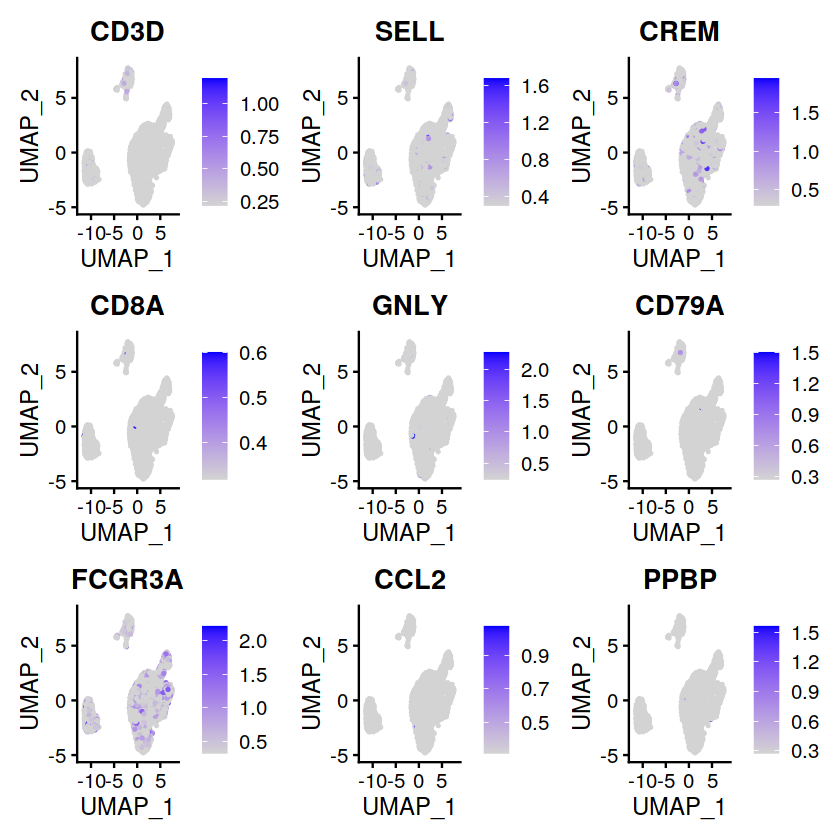

In [16]:
FeaturePlot(integrated, features = c("CD3D", "SELL", "CREM", "CD8A", "GNLY", "CD79A", "FCGR3A", 
    "CCL2", "PPBP"), min.cutoff = "q9")

ggsave(file=file.path(outdir,"seuratImmuneEmbed.png"))


Warning message in FetchData(object = object, vars = features, cells = cells):
"The following requested variables were not found: MIR155HG"
Saving 6.67 x 6.67 in image



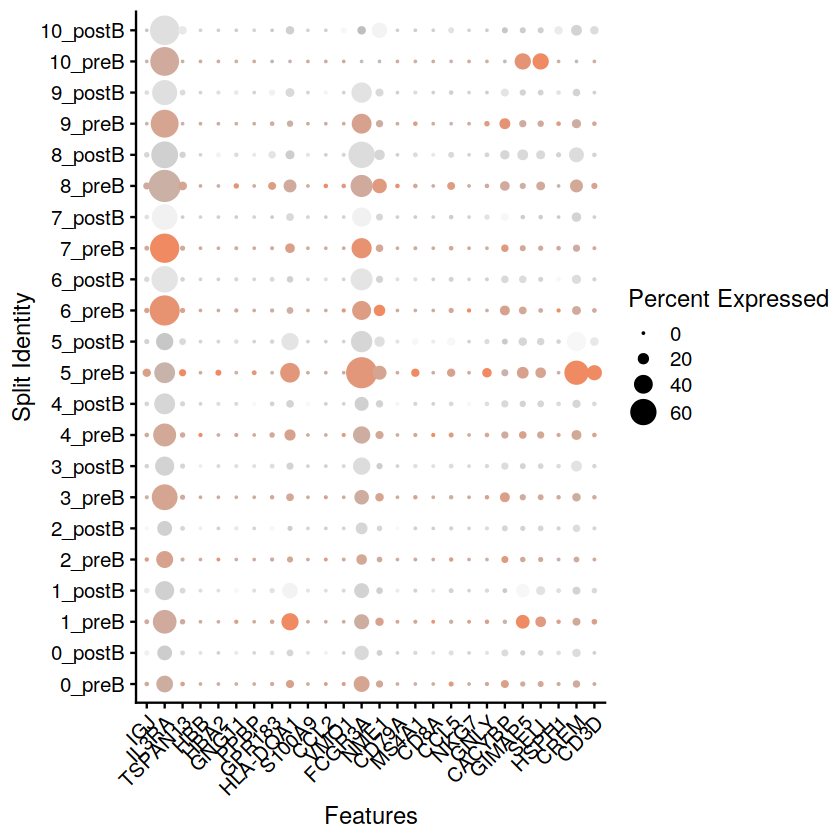

In [17]:
markers.to.plot <- c("CD3D", "CREM", "HSPH1", "SELL", "GIMAP5", "CACYBP", "GNLY", "NKG7", "CCL5", 
    "CD8A", "MS4A1", "CD79A", "MIR155HG", "NME1", "FCGR3A", "VMO1", "CCL2", "S100A9", "HLA-DQA1", 
    "GPR183", "PPBP", "GNG11", "HBA2", "HBB", "TSPAN13", "IL3RA", "IGJ")
DotPlot(integrated, features = rev(markers.to.plot), dot.scale = 8, cols=clrs,  
    split.by = "orig.ident") + RotatedAxis()
ggsave(file=file.path(outdir,"seuratImmuneDotPlot.png"))

### Immune markers taken from Dawn Lin et al Flt3l paper

Warning message in FetchData(object = object, vars = features, cells = cells):
"The following requested variables were not found: SLAMF2"
Saving 6.67 x 6.67 in image



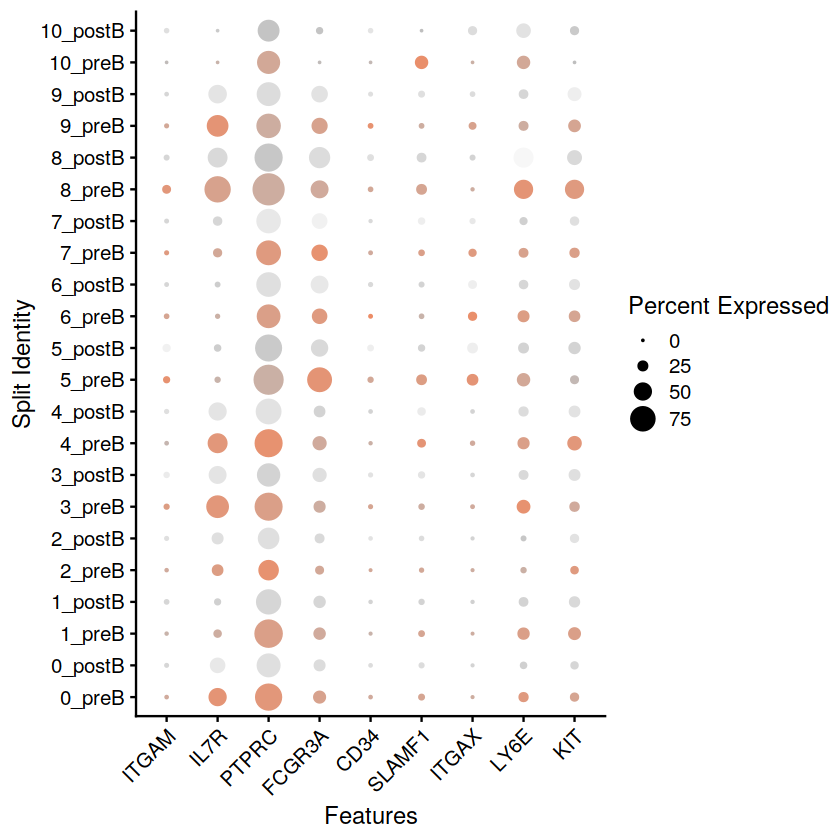

In [18]:
immune.markers = c('KIT',
                   'LY6E',
                   'ITGAX',
                   'SLAMF1',
                   'CD34',
                   'FCGR3A',
                   'PTPRC',
                   'SLAMF2',
                   'IL7R',
                   'ITGAM')

DotPlot(integrated, features = rev(immune.markers), dot.scale = 8, 
        cols = clrs,
    split.by = "orig.ident") + RotatedAxis()
ggsave(file=file.path(outdir,"linImmuneDotPlot.png"))

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: SLAMF2"
Saving 6.67 x 6.67 in image



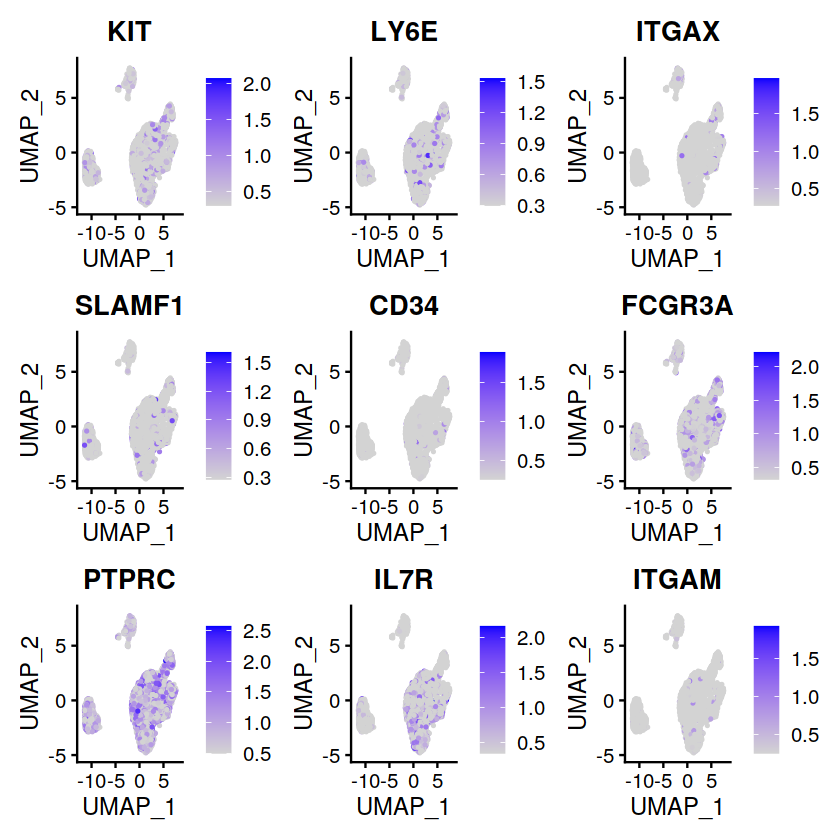

In [19]:
FeaturePlot(integrated, features = immune.markers, min.cutoff = "q9")
ggsave(file=file.path(outdir,"linImmuneEmbed.png"))

## Loop through each cluster and run DA for ATAC-seq

In [20]:
DefaultAssay(integrated) <- "ATAC"
cluster.ids <- sort(unique(integrated$seurat_clusters))
for (i in cluster.ids){ #or however many clusters you have
try({
    print(paste("cluster", i))
    da.peaks <- FindMarkers(
                  object = integrated,
                  ident.1 = i, #"CD4 Naive",
                  min.pct = minPct,
                  test.use = 'LR', latent.vars = 'peak_region_fragments'
                )
    print(head(da.peaks))
    write.csv(da.peaks, file=file.path(clust_atac_outdir, paste0("cluster_",i,".DE.PeakActivity.csv")))
    print(paste('saved cluster', i))
    plotDE(integrated, da.peaks, i, clust_atac_outdir)
    print(paste('plotted cluster', i))
    
})
}

# put back to RNA
DefaultAssay(integrated) <- "RNA"


[1] "cluster 0"
                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr17-82126354-82128111  3.575789e-44  0.5283804 0.416 0.209 1.513203e-39
chr19-16368699-16370559  6.937084e-40  0.4883807 0.379 0.203 2.935635e-35
chr2-113876405-113877287 2.684604e-37  0.5642470 0.238 0.083 1.136071e-32
chr10-62183251-62184119  4.848188e-36  0.5622197 0.290 0.115 2.051656e-31
chr13-73984798-73985553  1.588710e-35  0.5670805 0.217 0.072 6.723104e-31
chr6-167112729-167114887 1.458550e-31 -0.5423227 0.004 0.134 6.172291e-27
[1] "saved cluster 0"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 0"
[1] "cluster 1"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                 p_val avg_log2FC pct.1 pct.2     p_val_adj
chr2-231671303-231673284 3.968143e-193   1.385009 0.445 0.008 1.679239e-188
chr8-28338153-28339922   1.501393e-175   1.346467 0.407 0.006 6.353593e-171
chr6-167112729-167114887 4.323968e-167   1.325892 0.505 0.033 1.829817e-162
chr11-95715548-95716381  2.485687e-166   1.328892 0.389 0.006 1.051893e-161
chr6-90375476-90376336   1.541564e-159   1.303589 0.386 0.008 6.523591e-155
chr6-150622744-150623762 9.041613e-159   1.311871 0.423 0.016 3.826230e-154
[1] "saved cluster 1"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 1"
[1] "cluster 2"
                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr11-65421105-65428554  2.492166e-18 -0.5350201 0.153 0.454 1.054635e-13
chr19-54189076-54191614  1.246387e-13 -0.3458012 0.355 0.659 5.274462e-09
chr11-62839312-62842762  9.073564e-13 -0.4068831 0.235 0.527 3.839751e-08
chr7-100368209-100370006 3.129736e-12 -0.4415726 0.006 0.110 1.324442e-07
chr16-21359908-21360687  1.380629e-11 -0.3701061 0.000 0.074 5.842548e-07
chr17-43360192-43362202  1.407813e-11 -0.4009268 0.219 0.478 5.957583e-07
[1] "saved cluster 2"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 2"
[1] "cluster 3"
                               p_val avg_log2FC pct.1 pct.2    p_val_adj
chr2-86785367-86786744  2.745582e-67  0.9392968 0.359 0.057 1.161876e-62
chr12-10554115-10555430 3.336730e-63  0.9229451 0.254 0.023 1.412037e-58
chr2-86825722-86826746  8.772516e-39  0.7301453 0.214 0.034 3.712353e-34
chr12-1277791-1278375   1.939151e-34  0.6866591 0.169 0.022 8.206100e-30
chr17-82126354-82128111 1.501842e-33  0.5720396 0.506 0.214 6.355494e-29
chr20-53388212-53388745 1.974605e-30  0.6431213 0.145 0.017 8.356134e-26
[1] "saved cluster 3"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 3"
[1] "cluster 4"
                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr10-33133999-33134689  2.858396e-27  0.6919971 0.170 0.021 1.209616e-22
chr14-64755813-64756297  2.936822e-24  0.6337633 0.136 0.016 1.242804e-19
chr11-3512069-3512652    1.828216e-23  0.6521940 0.153 0.021 7.736646e-19
chr10-12448584-12449524  2.962826e-23  0.6311979 0.303 0.094 1.253809e-18
chr1-184890397-184891007 5.001657e-22  0.6147197 0.150 0.023 2.116601e-17
chr5-912337-912980       1.552716e-21  0.5804562 0.113 0.011 6.570783e-17
[1] "saved cluster 4"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 4"
[1] "cluster 5"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                 p_val avg_log2FC pct.1 pct.2     p_val_adj
chr14-50038437-50039238  1.063145e-145   1.691428 0.525 0.004 4.499015e-141
chr6-44058393-44059510   3.452702e-126   1.586568 0.459 0.003 1.461114e-121
chr10-30493460-30494630  1.320881e-123   1.596473 0.514 0.011 5.589703e-119
chr2-47071386-47073302   1.661673e-112   1.537753 0.553 0.023 7.031867e-108
chr7-157854043-157854781 5.239850e-112   1.505823 0.400 0.002 2.217400e-107
chr1-234656954-234657607 9.559206e-110   1.483691 0.396 0.002 4.045265e-105
[1] "saved cluster 5"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 5"
[1] "cluster 6"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr22-23263712-23264504  1.314475e-65   1.232253 0.365 0.025 5.562597e-61
chr4-8409163-8410086     1.798201e-64   1.215013 0.454 0.048 7.609628e-60
chr12-52566659-52567503  1.472772e-57   1.177770 0.345 0.026 6.232476e-53
chr1-184386663-184388161 2.753523e-56   1.133881 0.414 0.051 1.165236e-51
chr7-38317398-38317995   3.517722e-55   1.106524 0.257 0.010 1.488629e-50
chr20-20215992-20216709  1.017342e-53   1.127317 0.269 0.012 4.305188e-49
[1] "saved cluster 6"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 6"
[1] "cluster 7"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr12-52566659-52567503  3.982381e-50   1.290860 0.402 0.030 1.685264e-45
chr4-8409163-8410086     1.501373e-44   1.191097 0.448 0.057 6.353512e-40
chr18-80175191-80175964  3.278908e-42   1.198393 0.333 0.021 1.387568e-37
chr6-105646199-105646957 4.656025e-38   1.139736 0.310 0.023 1.970336e-33
chr5-76732655-76733463   1.446934e-37   1.123893 0.264 0.014 6.123136e-33
chr16-81524162-81524889  9.109619e-34   1.075160 0.299 0.029 3.855008e-29
[1] "saved cluster 7"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 7"
[1] "cluster 8"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr8-20492848-20493801   2.574908e-21  0.8277389 0.486 0.102 1.089650e-16
chr5-134086628-134087518 2.522097e-18  0.8464473 0.500 0.102 1.067301e-13
chr1-234408652-234409669 1.786493e-16  0.7812182 0.295 0.046 7.560080e-12
chr17-75036499-75037218  7.218060e-15  0.7297646 0.486 0.121 3.054539e-10
chr3-168094682-168096524 1.447014e-14 -0.4216686 0.021 0.122 6.123473e-10
chr16-10876628-10877426  4.706455e-14 -0.3687307 0.014 0.094 1.991678e-09
[1] "saved cluster 8"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 8"
[1] "cluster 9"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                                 p_val avg_log2FC pct.1 pct.2    p_val_adj
chr11-114065915-114066565 1.050385e-33   1.217791 0.300 0.014 4.445020e-29
chr14-101712854-101714002 2.216015e-31   1.186661 0.354 0.030 9.377734e-27
chr2-9702879-9703855      9.088069e-31   1.132313 0.454 0.066 3.845889e-26
chr15-58209172-58209531   3.973224e-30   1.104149 0.208 0.004 1.681389e-25
chr17-82909333-82909909   1.012096e-28   1.134250 0.269 0.014 4.282987e-24
chr1-57307250-57307908    5.555704e-28   1.126203 0.331 0.030 2.351063e-23
[1] "saved cluster 9"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 9"
[1] "cluster 10"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr7-101717697-101718358 1.059849e-18   2.047556 0.684 0.017 4.485068e-14
chr16-17591224-17591484  9.710740e-14   1.836357 0.474 0.009 4.109391e-09
chr1-182149248-182149857 2.073881e-13   1.762900 0.579 0.028 8.776252e-09
chr12-64699708-64700081  2.556225e-12   1.733862 0.474 0.013 1.081743e-07
chr20-4829544-4829899    6.750703e-12   1.703218 0.474 0.014 2.856762e-07
chr2-145693061-145693505 7.364654e-11   1.618546 0.474 0.018 3.116574e-06
[1] "saved cluster 10"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 10"


In [29]:
outdir <- cond_outdir

DefaultAssay(integrated) <- "ATAC"
#sample_names
cluster.ids <- sort(unique(integrated$seurat_clusters))
integrated$celltype.stim <- paste(integrated$seurat_clusters, integrated$orig.ident, sep = "_")
integrated$celltype <- integrated$seurat_clusters
Idents(integrated) <- "celltype.stim"
for (c in cluster.ids){
        print(c)
        response <- FindMarkers(integrated, 
                                ident.1 = paste0(c, "_", sample_names[[1]]), 
                                ident.2 = paste0(c, "_", sample_names[[2]]), 
                                verbose = FALSE,
                                test.use = 'LR', min.pct = minPct,
                                latent.vars='peak_region_fragments')
        write.csv(response, file=file.path(clust_atac_outdir, paste0("cluster_",c,".peak.DE.conditions.csv")))
}

[1] "0"
[1] "1"
[1] "2"
[1] "3"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] "4"
[1] "5"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] "6"
[1] "7"
[1] "8"
[1] "9"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] "10"


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

## Conserved markers to help identify cell type

In [21]:
topMarkers = c()
for (i in cluster.ids){ #or however many clusters you have
try({
    print(paste("cluster", i))
    cons.markers <- FindConservedMarkers(integrated, ident.1 = i, 
                                         grouping.var = "orig.ident", verbose = TRUE)

    write.csv(cons.markers, file=file.path(cons_outdir,paste0("cluster_",i,".conservedOverStim.GeneActivity.csv")))
    print(paste('saved cluster', i))
    print(head(cons.markers))
    topMarkers = c(topMarkers, rownames(cons.markers)[1])
    print(topMarkers)
})
}

head(cons.markers)

[1] "cluster 0"


Testing group preB: (0) vs (6, 2, 5, 7, 9, 4, 3, 1, 8, 10)

Testing group postB: (0) vs (7, 4, 6, 2, 1, 5, 3, 8, 9, 10)



[1] "saved cluster 0"
          preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
LPCAT1  1.268789e-13      -0.4428689      0.093      0.346   2.538847e-09
PLCG2   1.441875e-19      -0.6463938      0.065      0.388   2.885192e-15
ANKRD44 7.704776e-18       0.5235489      0.645      0.403   1.541726e-13
PFDN1   1.039790e-15      -0.5128885      0.145      0.435   2.080619e-11
TVP23A  9.756678e-17      -0.4368111      0.014      0.282   1.952311e-12
ADAM9   3.540851e-15      -0.5185155      0.276      0.563   7.085243e-11
         postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2 postB_p_val_adj
LPCAT1  3.108376e-33       -0.4108430       0.083       0.338    6.219860e-29
PLCG2   7.006718e-32       -0.4743962       0.132       0.394    1.402044e-27
ANKRD44 7.895529e-32        0.5246561       0.622       0.427    1.579895e-27
PFDN1   5.712882e-31       -0.3995513       0.144       0.414    1.143148e-26
TVP23A  5.899617e-31       -0.3150339       0.042       0.271    1.180

Testing group preB: (1) vs (0, 6, 2, 5, 7, 9, 4, 3, 8, 10)

Testing group postB: (1) vs (7, 4, 6, 0, 2, 5, 3, 8, 9, 10)



[1] "saved cluster 1"
           preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
TVP23A   3.123707e-72       0.8193135      0.704      0.133   6.250537e-68
CDC123   3.625001e-87       0.8357410      0.668      0.085   7.253628e-83
MAPK1    3.761174e-97       0.8826497      0.704      0.086   7.526110e-93
C6ORF165 3.296707e-59       0.4503239      0.408      0.032   6.596710e-55
CLMN     1.815035e-88       0.7130179      0.607      0.056   3.631884e-84
IYD      2.065597e-63       0.4719226      0.429      0.034   4.133260e-59
           postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2 postB_p_val_adj
TVP23A   1.480810e-117        0.7421399       0.656       0.144   2.963101e-113
CDC123   7.019751e-115        0.6531044       0.554       0.095   1.404652e-110
MAPK1    2.273999e-112        0.6615756       0.535       0.091   4.550272e-108
C6ORF165 1.246001e-104        0.5644850       0.422       0.052   2.493248e-100
CLMN     1.696490e-103        0.6432498       0.511  

Testing group preB: (2) vs (0, 6, 5, 7, 9, 4, 3, 1, 8, 10)

Testing group postB: (2) vs (7, 4, 6, 0, 1, 5, 3, 8, 9, 10)



[1] "saved cluster 2"
          preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
KIR3DL1 1.074122e-20      -0.5025022      0.310      0.747   2.149319e-16
GNG7    5.028418e-20      -0.4600588      0.139      0.520   1.006186e-15
DNAH17  1.160997e-19      -0.4499104      0.250      0.669   2.323156e-15
DKKL1   2.006147e-19      -0.4608204      0.255      0.667   4.014300e-15
MOB3A   2.480132e-15      -0.3093135      0.199      0.551   4.962743e-11
RELA    3.882279e-15      -0.3063121      0.190      0.546   7.768440e-11
         postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2 postB_p_val_adj
KIR3DL1 1.324412e-09       -0.2609644       0.374       0.608    2.650149e-05
GNG7    1.881086e-16       -0.3198298       0.199       0.488    3.764054e-12
DNAH17  3.650507e-11       -0.2835485       0.346       0.602    7.304665e-07
DKKL1   1.060198e-12       -0.2663731       0.252       0.523    2.121456e-08
MOB3A   1.200127e-17       -0.3328396       0.150       0.448    2.401

Testing group preB: (3) vs (0, 6, 2, 5, 7, 9, 4, 1, 8, 10)

Testing group postB: (3) vs (7, 4, 6, 0, 2, 1, 5, 8, 9, 10)



[1] "saved cluster 3"
               preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
RNF103-CHMP3 1.164382e-28       0.8043917      0.827      0.340   2.329929e-24
CHMP3        1.164382e-28       0.8043917      0.827      0.340   2.329929e-24
KLRC4-KLRK1  1.395511e-37       0.5124238      0.490      0.075   2.792417e-33
DKK2         1.238418e-10       0.3975135      0.971      0.722   2.478075e-06
RHOH         2.606330e-08       0.3437399      0.779      0.519   5.215266e-04
ANKRD6       1.560647e-14       0.5709191      0.933      0.660   3.122854e-10
               postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2
RNF103-CHMP3 3.985785e-101        0.9836577       0.732       0.259
CHMP3        5.538506e-101        0.9832368       0.732       0.259
KLRC4-KLRK1   1.155203e-51        0.4147243       0.365       0.089
DKK2          4.748391e-29        0.4942772       0.890       0.698
RHOH          1.028619e-21        0.4037795       0.714       0.478
ANKRD6        2.2

Testing group preB: (4) vs (0, 6, 2, 5, 7, 9, 3, 1, 8, 10)

Testing group postB: (4) vs (7, 6, 0, 2, 1, 5, 3, 8, 9, 10)



[1] "saved cluster 4"
           preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
ATXN1    3.250149e-10       0.5716188      0.872      0.683   6.503548e-06
C10ORF68 2.738500e-17       0.7274002      0.907      0.580   5.479739e-13
MKLN1    2.508618e-09       0.4980924      0.930      0.821   5.019744e-05
NBEAL1   9.026015e-13       0.5708745      0.640      0.291   1.806106e-08
BRIP1    4.769576e-11       0.5383952      0.826      0.542   9.543921e-07
FAM129A  3.164243e-06       0.3695693      0.465      0.252   6.331650e-02
          postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2 postB_p_val_adj
ATXN1    1.779780e-29        0.5505119       0.914       0.712    3.561339e-25
C10ORF68 4.340360e-29        0.6134832       0.775       0.546    8.685061e-25
MKLN1    2.087140e-22        0.5372467       0.940       0.821    4.176367e-18
NBEAL1   1.607363e-20        0.4993395       0.577       0.329    3.216333e-16
BRIP1    7.286359e-19        0.4037020       0.745       0

Testing group preB: (5) vs (0, 6, 2, 7, 9, 4, 3, 1, 8, 10)

Testing group postB: (5) vs (7, 4, 6, 0, 2, 1, 3, 8, 9, 10)



[1] "saved cluster 5"
            preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
FANCI     1.529922e-89       0.8290439      0.879      0.037   3.061374e-85
TGM3      1.626111e-67       0.6591376      0.758      0.038   3.253848e-63
TMEM87B   5.301206e-56       0.7280582      0.727      0.045   1.060771e-51
SIGLECL1  9.449610e-92       0.4653283      0.576      0.009   1.890867e-87
PRCD      8.768190e-73       0.6849514      0.758      0.033   1.754515e-68
FAM181A  1.749038e-106       0.3442641      0.485      0.002  3.499826e-102
           postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2 postB_p_val_adj
FANCI    6.606324e-208        0.8657992       0.739       0.056   1.321926e-203
TGM3     5.421498e-205        0.6733396       0.676       0.041   1.084842e-200
TMEM87B  1.053647e-190        0.8340611       0.694       0.053   2.108348e-186
SIGLECL1 2.438792e-171        0.3966999       0.455       0.015   4.880023e-167
PRCD     7.840315e-170        0.5948357       

Testing group preB: (6) vs (0, 2, 5, 7, 9, 4, 3, 1, 8, 10)

Testing group postB: (6) vs (7, 4, 0, 2, 1, 5, 3, 8, 9, 10)



[1] "saved cluster 6"
               preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
RP11-468E2.4 5.261818e-29       0.5884160      0.432      0.061   1.052890e-24
IRF9         8.353519e-19       0.4181064      0.338      0.057   1.671539e-14
APMAP        1.465103e-17       0.6685102      0.581      0.180   2.931671e-13
HNF1B        1.051188e-17       0.7361896      0.568      0.175   2.103427e-13
STOX1        1.358711e-19       0.6950632      0.581      0.164   2.718780e-15
ARHGDIG      1.707888e-14       0.4455224      0.459      0.137   3.417484e-10
               postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2
RP11-468E2.4 1.640386e-116        0.6166916       0.400       0.021
IRF9         4.981678e-109        0.4960929       0.343       0.015
APMAP         1.405616e-87        0.8934983       0.611       0.099
HNF1B         1.536750e-80        0.8211449       0.617       0.115
STOX1         2.233821e-60        0.7195951       0.537       0.109
ARHGDIG       2.6

Testing group preB: (7) vs (0, 6, 2, 5, 9, 4, 3, 1, 8, 10)

Testing group postB: (7) vs (4, 6, 0, 2, 1, 5, 3, 8, 9, 10)



[1] "saved cluster 7"
          preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
HNF1B   1.088363e-44       0.9466418      0.641      0.145   2.177814e-40
GPR114  3.345564e-38       0.9055196      0.617      0.158   6.694473e-34
APMAP   6.347775e-36       0.7542035      0.609      0.155   1.270190e-31
CADM1   2.842916e-31       0.8504808      0.594      0.183   5.688674e-27
JAKMIP1 1.494799e-26       0.6410372      0.469      0.117   2.991092e-22
FEZ2    5.947287e-26       0.6127604      0.422      0.098   1.190052e-21
         postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2 postB_p_val_adj
HNF1B   2.932201e-08        0.6509007       0.413       0.145    0.0005867334
GPR114  7.733809e-08        0.5056725       0.413       0.145    0.0015475352
APMAP   6.424748e-09        0.5144371       0.413       0.129    0.0001285592
CADM1   1.092663e-03        0.4843665       0.391       0.233    1.0000000000
JAKMIP1 6.705471e-08        0.4162885       0.413       0.143    0.001

Testing group preB: (8) vs (0, 6, 2, 5, 7, 9, 4, 3, 1, 10)

Testing group postB: (8) vs (7, 4, 6, 0, 2, 1, 5, 3, 9, 10)



[1] "saved cluster 8"
          preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
ABL1    7.119429e-11       0.2530743      0.667      0.203   1.424598e-06
KIF22   5.832733e-07       0.2959673      0.978      0.489   1.167130e-02
RNF213  6.764656e-05       0.3069291      0.867      0.551   1.000000e+00
HYOU1   7.391169e-08       0.3231170      0.933      0.448   1.478973e-03
MAPKAP1 1.172499e-06       0.3968415      1.000      0.634   2.346170e-02
SKI     2.769920e-06       0.2903658      0.956      0.498   5.542611e-02
         postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2 postB_p_val_adj
ABL1    1.173974e-22        0.2921430       0.752       0.252    2.349123e-18
KIF22   5.829989e-17        0.3673487       0.881       0.404    1.166581e-12
RNF213  1.043242e-13        0.4071779       0.950       0.519    2.087528e-09
HYOU1   1.205257e-12        0.3176298       0.901       0.436    2.411719e-08
MAPKAP1 1.849344e-11        0.3564310       0.980       0.600    3.700

Testing group preB: (9) vs (0, 6, 2, 5, 7, 4, 3, 1, 8, 10)

Testing group postB: (9) vs (7, 4, 6, 0, 2, 1, 5, 3, 8, 10)



[1] "saved cluster 9"
               preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
ZBTB16       3.739605e-22       1.0530406      0.857      0.279   7.482950e-18
QPCT         4.351689e-06       0.2601556      0.405      0.142   8.707729e-02
RP11-12J10.3 1.241800e-25       0.5794471      0.476      0.057   2.484841e-21
STARD3NL     4.728774e-10       0.6066722      0.690      0.271   9.462277e-06
GDF15        2.601236e-21       0.5204574      0.405      0.050   5.205074e-17
CAMKK1       3.009570e-06       0.4139076      0.476      0.192   6.022151e-02
              postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2
ZBTB16       9.650044e-36        1.0926713       0.807       0.301
QPCT         7.548883e-28        0.4909785       0.477       0.102
RP11-12J10.3 8.034343e-09        0.3046099       0.318       0.120
STARD3NL     1.755595e-25        0.6830179       0.591       0.178
GDF15        3.704420e-25        0.3018051       0.307       0.048
CAMKK1       2.668846e-

Testing group preB: (10) vs (0, 6, 2, 5, 7, 9, 4, 3, 1, 8)

Testing group postB: (10) vs (7, 4, 6, 0, 2, 1, 5, 3, 8, 9)



[1] "saved cluster 10"
          preB_p_val preB_avg_log2FC preB_pct.1 preB_pct.2 preB_p_val_adj
FOXRED2 1.066532e-16       1.4525522      0.667      0.018   2.134131e-12
IGSF5   9.321048e-09       1.3515442      0.667      0.039   1.865142e-04
OR2H2   1.017702e-11       0.4873140      0.333      0.006   2.036421e-07
ZNF493  1.900947e-05       0.8553055      0.667      0.065   3.803795e-01
EIF3D   2.224192e-37       1.5828482      1.000      0.016   4.450608e-33
MRPS6   2.512243e-10       2.4199304      1.000      0.078   5.026999e-06
         postB_p_val postB_avg_log2FC postB_pct.1 postB_pct.2 postB_p_val_adj
FOXRED2 2.323051e-46        0.4764135       0.562       0.020    4.648424e-42
IGSF5   6.802597e-43        0.8221891       0.750       0.041    1.361200e-38
OR2H2   1.621798e-39        0.2884534       0.312       0.007    3.245217e-35
ZNF493  5.747536e-38        0.6865242       0.875       0.063    1.150082e-33
EIF3D   3.167023e-32        0.4292894       0.625       0.037    6.33

,preB_p_val,preB_avg_log2FC,preB_pct.1,preB_pct.2,preB_p_val_adj,postB_p_val,postB_avg_log2FC,postB_pct.1,postB_pct.2,postB_p_val_adj,max_pval,minimump_p_val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FOXRED2,1.066532e-16,1.4525522,0.667,0.018,2.134131e-12,2.323051e-46,0.4764135,0.562,0.020,4.648424e-42,1.066532e-16,4.646101e-46
IGSF5,9.321048e-09,1.3515442,0.667,0.039,1.865142e-04,6.802597e-43,0.8221891,0.750,0.041,1.361200e-38,9.321048e-09,1.360519e-42
OR2H2,1.017702e-11,0.4873140,0.333,0.006,2.036421e-07,1.621798e-39,0.2884534,0.312,0.007,3.245217e-35,1.017702e-11,3.243595e-39
ZNF493,1.900947e-05,0.8553055,0.667,0.065,3.803795e-01,5.747536e-38,0.6865242,0.875,0.063,1.150082e-33,1.900947e-05,1.149507e-37
EIF3D,2.224192e-37,1.5828482,1.000,0.016,4.450608e-33,3.167023e-32,0.4292894,0.625,0.037,6.337213e-28,3.167023e-32,4.448384e-37
MRPS6,2.512243e-10,2.4199304,1.000,0.078,5.026999e-06,6.259646e-36,0.8661283,0.938,0.079,1.252555e-31,2.512243e-10,1.251929e-35


In [22]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/isaac/miniconda3/envs/mttrace/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] future_1.23.0             RColorBrewer_1.1-2       
 [3] metap_1.1                 cowplot_1.1.1            
 [5] magrittr_2.0.1            data.table_1.14.2        
 [7] patchwork_1.1.1           ggplot2_3.3.5            
 [9] EnsDb.Hsapiens.v75_2.99.0 ensembldb_2.18.1         
[11] 